# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [15]:
# Import warnings
import warnings


# Import the libraries you will be using for analysis



In [17]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [20]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [26]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

In [28]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select the folder having data files
#os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')
os.chdir('/Users/Prasi/trip_records')
# Create a list of all the twelve files to read
file_list = os.listdir()
print("execution started")

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(file_path)
        # Reading the current file
        df_mon=pd.read_parquet(file_path)
        #print(df_mon)
        df_mon["tpep_pickup_datetime"]=pd.to_datetime(df_mon["tpep_pickup_datetime"])

        df_mon["date"] = df_mon["tpep_pickup_datetime"].dt.date
        df_mon["hour"] = df_mon["tpep_pickup_datetime"].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df_mon["date"].unique():
            df_day = df_mon[df_mon["date"] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                df_hour = df_day[df_day["hour"] == hour]
                # Sample 5% of the hourly data randomly
                df_sampled_hour = df_hour.sample(frac=0.05, random_state=42) if not df_hour.empty else pd.DataFrame()
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, df_sampled_hour])


        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])
        print(len(df)) 
        
        #df = # we initialised this empty DF earlier
        #df.shape()
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

execution started
C:\Users\Prasi\trip_records\2023-1.parquet
152087
C:\Users\Prasi\trip_records\2023-10.parquet
326342
C:\Users\Prasi\trip_records\2023-11.parquet
491475
C:\Users\Prasi\trip_records\2023-12.parquet
658184
C:\Users\Prasi\trip_records\2023-2.parquet
826880
C:\Users\Prasi\trip_records\2023-3.parquet
990666
C:\Users\Prasi\trip_records\2023-4.parquet
1130307
C:\Users\Prasi\trip_records\2023-5.parquet
1274765
C:\Users\Prasi\trip_records\2023-6.parquet
1437675
C:\Users\Prasi\trip_records\2023-7.parquet
1611743
C:\Users\Prasi\trip_records\2023-8.parquet
1755525
C:\Users\Prasi\trip_records\2023-9.parquet
1896400
C:\Users\Prasi\trip_records\final-sample.parquet


KeyboardInterrupt: 

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [37]:
# Store the df in csv/parquet
print("test")
print(len(df)) 
df.to_parquet('final-sample.parquet')

test
1896400


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df=pd.read_parquet('final-sample.parquet')


In [ ]:
 df.head()

In [ ]:
 df.info()

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [66]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)
df.head()
#df.info()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [68]:
# Combine the two airport fee columns
#df = df.groupby(df.columns, axis=1).first()
#df = df.T.groupby(level=0).first().T 
print("test")
#df = df.T.groupby(level=0).sum().T
#print(df.columns[df.columns.duplicated()])
#print(len(df)) 
df["airport_fee"] = df["airport_fee"] + df["Airport_fee"]
df.drop(columns=["Airport_fee"], inplace=True) 
print("done")
df.info()

   

test
done
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee 

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [70]:
# check where values of fare amount are negative
print("negative fareamount")
negative_fareamount = df[df["fare_amount"] < 0]
print(negative_fareamount)
df.head()

negative fareamount
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 21 columns]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    6.0      0.5        0.00           0.0   
1             1  ...    1.0      0.5        2.58           0.0   
2             2  ...    1.0      0.5        0.00           0.0   
3             2  ...    1.0      0.5        0.00           0.0   
4             0  ...    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0          NaN   
1                    1.0         15.48                   2.5          NaN   
2                    1.0         16.40                   2.5          NaN   
3                    1.0         11.50                   2.5          NaN   
4                    1.0         35.57                   NaN          NaN   

         date hour  
0  2023-01-01    0  
1  2023-01-01    0  
2  2023-01-01    0  
3  2023-01-01    0  
4  2023-01-01    0  

[5 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [72]:
# Analyse RatecodeID for the negative fare amounts
df.head()
display_ratecode = df.loc[df["fare_amount"] < 0, ["RatecodeID", "fare_amount"]]
print(display_ratecode)

Empty DataFrame
Columns: [RatecodeID, fare_amount]
Index: []


In [74]:
# Find which columns have negative values
df.info()
df_numericcolumns = df[["fare_amount", "tip_amount", "payment_type","mta_tax","extra","tolls_amount","improvement_surcharge","total_amount","congestion_surcharge","airport_fee"]]
columns_negative_values = df_numericcolumns.columns[(df_numericcolumns < 0).any(axis=0)].tolist()
print("Columns with negative values:", columns_negative_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [ ]:
# fix these negative values
df[columns_negative_values] = df[columns_negative_values].abs()


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [76]:
# Find the proportion of missing values in each column
missing_values= df.isnull().mean()  # Calculates the proportion of missing values
print(missing_values)


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034209
trip_distance            0.000000
RatecodeID               0.034209
store_and_fwd_flag       0.034209
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034209
airport_fee              1.000000
date                     0.000000
hour                     0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [78]:
# Display the rows with null values
column_name = "passenger_count"  # Replace with the column you want to check
passenger_null_rows = df[df[column_name].isnull()]
print(passenger_null_rows)
#Impute NaN values in 'passenger_count'
df["passenger_count"] = df["passenger_count"].fillna(df["passenger_count"].mode()[0])
passenger_null_rows = df[df[column_name].isnull()]
print(passenger_null_rows)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...           ...                  ...                   ...              ...   
1896343         1  2023-09-30 23:18:31   2023-09-30 23:30:35              NaN   
1896356         1  2023-09-30 23:42:07   2023-10-01 00:05:22              NaN   
1896369         1  2023-09-30 23:59:39   2023-10-01 00:15:03              NaN   
1896376         1  2023-09-30 23:47:09   2023-10-01 00:03:01              NaN   
1896387         1  2023-09-30 23:17:34   2023-09-30 23:30:46              NaN   

         trip_distance  Rat

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [80]:
# Fix missing values in 'RatecodeID'
df.info()
df["RatecodeID"] = df["RatecodeID"].fillna(df["RatecodeID"].mode()[0])
RatecodeID_null = df[df["RatecodeID"].isnull()]
print("RatecodeID_null")
print(RatecodeID_null)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [82]:
# handle null values in congestion_surcharge
df["congestion_surcharge"] = df["congestion_surcharge"].fillna(df["congestion_surcharge"].mode()[0])



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values

df["store_and_fwd_flag"] = df["store_and_fwd_flag"].fillna(df["store_and_fwd_flag"].mode()[0])
#df["airport_fee"] = df["airport_fee"].fillna(df["airport_fee"].mode()[0])

#missing_values = df.isnull().mean()
#print(missing_values)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

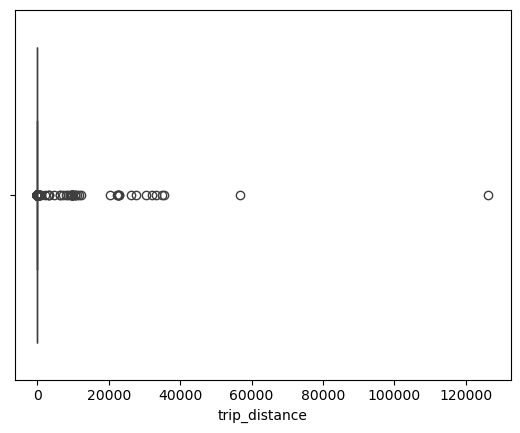

long_distance
     VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
77          1  2023-01-01 00:37:09   2023-01-01 00:58:16              1.0   
118         2  2023-01-01 00:47:28   2023-01-01 00:47:32              0.0   
127         1  2023-01-01 00:45:06   2023-01-01 00:54:06              1.0   
236         1  2023-01-01 00:53:00   2023-01-01 01:07:31              0.0   
280         2  2023-01-01 01:34:06   2023-01-01 01:34:14              2.0   

     trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
77             0.0         1.0               None            36             7   
118            0.0         5.0                  N           232           232   
127            0.0         1.0                  N            48            48   
236            0.0         1.0                  N           141            79   
280            0.0         5.0                  N           265           265   

     payment_type  ...  extra  mta_t

In [84]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()
#df.head()
sns.boxplot(x=df["trip_distance"])
plt.show()
zero_distance = df[df["trip_distance"] == 0]
# Display the first few rows
print("long_distance")
print(zero_distance.head())
long_distance = df[df["trip_distance"] > 250]
# Display the first few rows
print("long_distance")
print(long_distance.head())
print(f"Total zero-distance trips: {len(zero_distance)}")


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [86]:
# remove passenger_count > 6
print("test")

df.drop(df[df["passenger_count"] > 6].index, inplace=True)
df_passenger= df[df["passenger_count"] > 6]
print(df_passenger)

test
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 21 columns]


In [88]:
# Continue with outlier handling
#Removing rows with payment type 0
df.drop(df[df["payment_type"] == 0].index, inplace=True)
filter_payment_type= df[df["payment_type"] == 0]
print(filter_payment_type)

#Removing rows with tripdistance > 0
df.drop(df[df["trip_distance"] > 250].index, inplace=True)
filter_payment_type= df[df["trip_distance"] > 250]
print(filter_payment_type)


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 21 columns]


In [90]:
# Do any columns need standardising?
#Removing trip_distance` and `fare_amount` are 0
print("outliers")
df.drop(df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])].index,inplace=True)
outliers = df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])]
print(outliers)


outliers
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, date, hour]
Index: []

[0 rows x 21 columns]


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [92]:
df.columns.tolist()
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.831426e+06                     1831426                     1831426   
mean   1.736325e+00  2023-07-01 21:14:57.622951  2023-07-01 21:32:19.591796   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-01 20:11:28.500000  2023-04-01 20:26:02.750000   
50%    2.000000e+00  2023-06-26 08:19:46.500000         2023-06-26 08:35:50   
75%    2.000000e+00  2023-10-05 19:16:24.750000  2023-10-05 19:34:17.500000   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.406252e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.831426e+06   1.831426e+06  1.831426e+06  1.831426e+06   
mean      1.369147e+00   3.444772e+00  1.634213e+00  1.654596e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.780000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.370000e+00  1.000000e+00  2.340000e+02   
max       6.000000e+00   2.048600e+02  9.900000e+01  2.650000e+02   
std       8.924807e-01   4.545754e+00  7.391299e+00  6.367291e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.831426e+06  1.831426e+06  1.831426e+06  1.831426e+06  1.831426e+06   
mean   1.643343e+02  1.205013e+00  1.982512e+01  1.638262e+00  4.953166e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00 -2.500000e+00 -5.000000e-01   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  1.425000e+01  4.000000e+00   
std    6.974018e+01  4.665046e-01  1.073580e+02  1.836114e+00  4.867432e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.831426e+06  1.831426e+06           1.831426e+06  1.831426e+06   
mean   3.573704e+00  5.958175e-01           9.992434e-01  2.894863e+01   
min    0.000000e+00  0.000000e+00          -1.000000e+00 -5.750000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.860000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.450000e+00  0.000000e+00           1.000000e+00  3.070000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.071494e+00  2.183853e+00           2.725826e-02  1.082357e+02   

       congestion_surcharge  airport_fee          hour  
count          1.831426e+06          0.0  1.831426e+06  
mean           2.307624e+00          NaN  1.429544e+01  
min           -2.500000e+00          NaN  0.000000e+00  
25%            2.500000e+00          NaN  1.100000e+01  
50%            2.500000e+00          NaN  1.500000e+01  
75%            2.500000e+00          NaN  1.900000e+01  
max            2.500000e+00          NaN  2.300000e+01  
std            6.665527e-01          NaN  5.776982e+00

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:numerical
* `tpep_pickup_datetime`:categorical 
* `tpep_dropoff_datetime`: categorical
* `passenger_count`:numerical
* `trip_distance`:numerical
* `RatecodeID`:categorical
* `PULocationID`:categorical
* `DOLocationID`:categorical
* `payment_type`:categorical
* `pickup_hour`:numerical
* `trip_duration`:numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` : numerical
* `extra`: numerical
* `mta_tax`:numerical
* `tip_amount`: numerical
* `tolls_amount`: numerical
* `improvement_surcharge`:numerical
* `total_amount`:numerical
* `congestion_surcharge`:numerical
* `airport_fee`:numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour'],
      dtype='object')


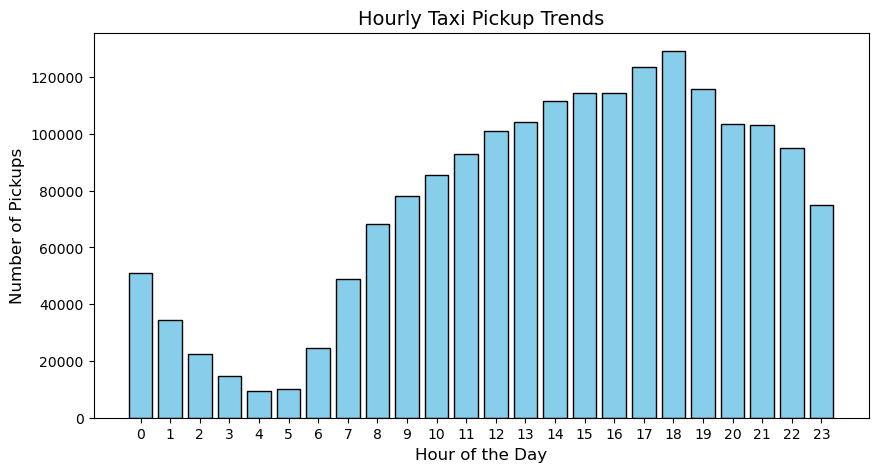

In [94]:
# Find and show the hourly trends in taxi pickups
#df = pd.DataFrame())
print(df.columns)

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime']) # Convert to datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour # Extract the hour
hourly_pickup = df['hour'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10, 5))
plt.bar(hourly_pickup.index, hourly_pickup.values, color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.title('Hourly Taxi Pickup Trends', fontsize=14)
plt.xticks(range(24))  # Ensure all 24 hours are displayed
plt.show()


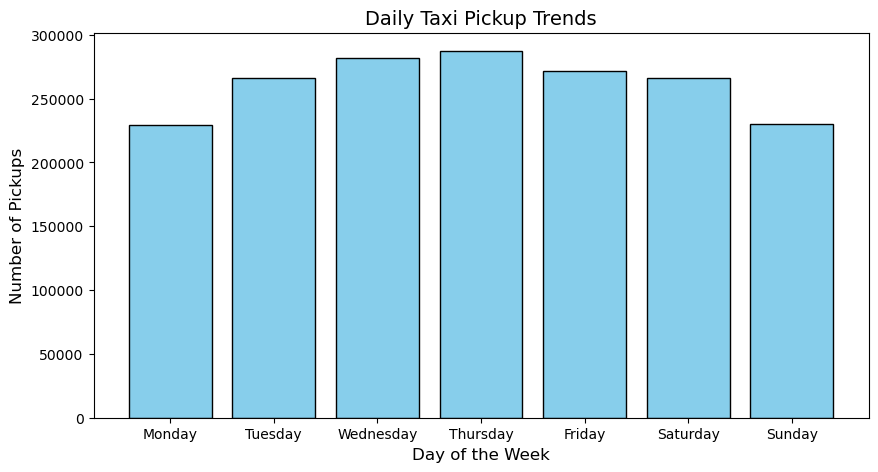

In [96]:
# Find and show the daily trends in taxi pickups (days of the week)

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])# Convert to datetime
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek # Extract the day of the week (0 = Monday, 6 = Sunday)
week_days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
            4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_of_week'] = df['day_of_week'].map(week_days)
daily_pickup = df['day_of_week'].value_counts().reindex(week_days.values())  

# Plot the bar
plt.figure(figsize=(10, 5))
plt.bar(daily_pickup.index, daily_pickup.values, color='skyblue', edgecolor='black')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.title('Daily Taxi Pickup Trends', fontsize=14)
plt.show()


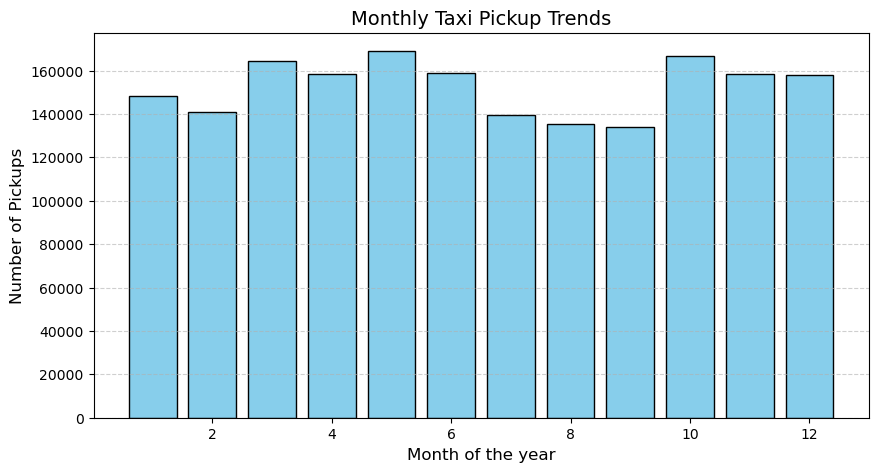

In [98]:
# Show the monthly trends in pickups

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])# Convert to datetime
df['month'] = df['tpep_pickup_datetime'].dt.month # Extract the month
monthly_pickup = df['month'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10, 5))
plt.bar(monthly_pickup.index, monthly_pickup.values, color='skyblue', edgecolor='black')
plt.xlabel('Month of the year', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.title('Monthly Taxi Pickup Trends', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [100]:
# Analyse the above parameters
financial_parameters = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]
negative_values = df[financial_parameters] < 0 # Check for negative values
zero_values = df[financial_parameters] == 0 # Check for zero values
print("Negative Values total:")
print(negative_values.sum())
print("Zero Values total")
print(zero_values.sum())
df.info()

 

Negative Values total:
fare_amount       0
tip_amount        0
total_amount     74
trip_distance     0
dtype: int64
Zero Values total
fare_amount         575
tip_amount       410262
total_amount        255
trip_distance     22962
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1831426 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13 

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [102]:
# Create a df with non zero entries for the selected parameters.

# Define the columns to check for non-zero values
financial_parameters = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]
df.info()
df = df[(df[financial_parameters] > 0).all(axis=1)]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1831426 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [104]:
# Group data by month and analyse monthly revenue
df.head()
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"]) 
df['month'] = df['tpep_pickup_datetime'].dt.month # Extract -Month
monthly_revenue = df.groupby("month")["fare_amount"].sum().reset_index() # Group by Month-Year and Sum Revenue
print(monthly_revenue) # Display Result



    month  fare_amount
0       1   2091343.80
1       2   1985954.36
2       3   2402851.50
3       4   2337163.49
4       5   2578239.89
5       6   2412537.11
6       7   2046889.42
7       8   1971620.12
8       9   2099962.68
9      10   2608606.33
10     11   2440124.86
11     12   2374370.88


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [106]:
# Calculate proportion of each quarter

# Extract quarter
df["quarter"] = df["tpep_pickup_datetime"].dt.to_period("Q") 
revenue_per_quarter = df.groupby("quarter")["fare_amount"].sum()
print(revenue_per_quarter)

quarter
2022Q4          6.50
2023Q1    6480149.66
2023Q2    7327940.49
2023Q3    6118472.22
2023Q4    7423095.57
Freq: Q-DEC, Name: fare_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [ ]:
# Show how trip fare is affected by distance

# Plot the trend
plt.figure(figsize=(10, 5))
plt.bar(df["fare_amount"], df["trip_distance"], color='skyblue', edgecolor='black')
plt.xlabel('Trip Fare', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title('Fare-distance correlation', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(24))  # Ensure all 24 hours are displayed
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

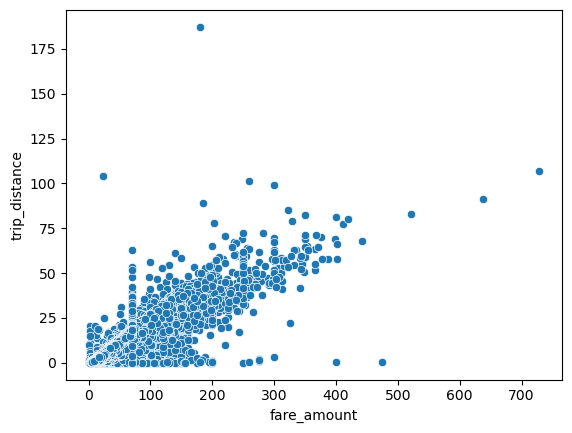

In [114]:
# Show relationship between fare and trip duration
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
sns.scatterplot(x=df["fare_amount"],y=df["trip_distance"])
plt.show()



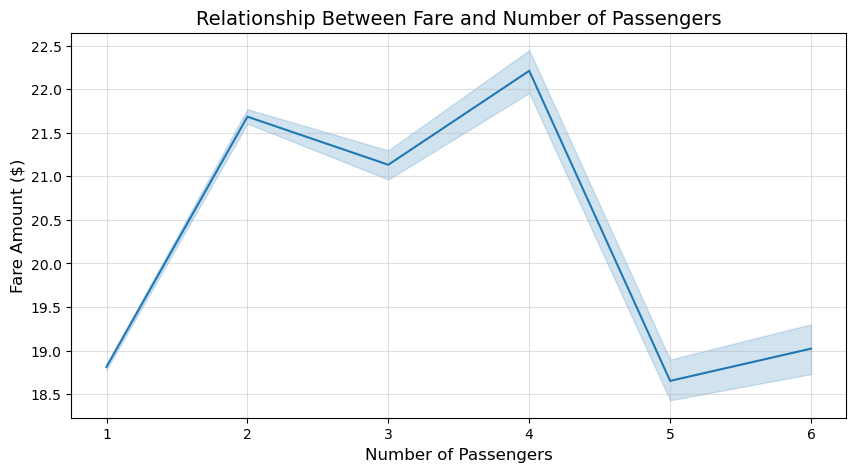

In [112]:
# Show relationship between fare and number of passengers

df = df[(df["fare_amount"] > 0) & (df["passenger_count"] > 0)]

# boxplot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="passenger_count", y="fare_amount")
plt.xlabel("Number of Passengers", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.title("Relationship Between Fare and Number of Passengers", fontsize=14)
plt.grid(alpha=0.4)
plt.show()

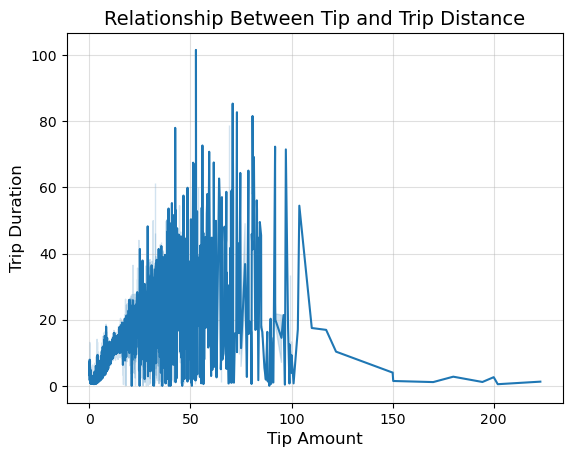

In [120]:
# Show relationship between tip and trip distance
sns.lineplot(x=df["tip_amount"], y=df["trip_distance"])

plt.xlabel("Tip Amount", fontsize=12)
plt.ylabel("Trip Duration", fontsize=12)
plt.title("Relationship Between Tip and Trip Distance", fontsize=14)
plt.grid(alpha=0.4)

plt.show()




**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Payment Type :
payment_type
1    1391224
2         21
4         16
3          7
Name: count, dtype: int64


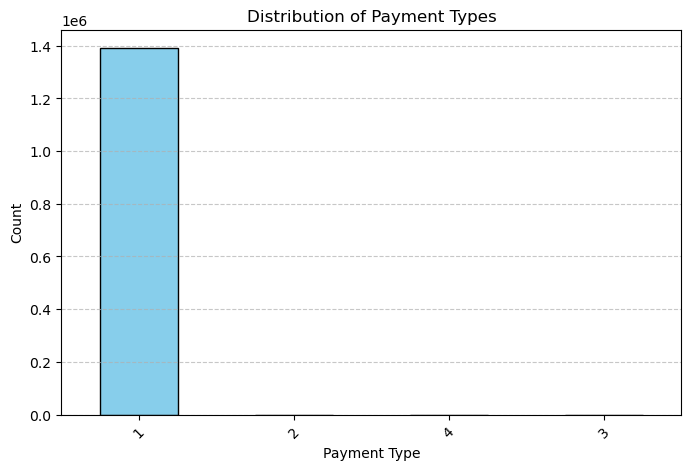

In [118]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = df['payment_type'].value_counts()
print("Payment Type :")
print(payment_counts)
plt.figure(figsize=(8,5))
payment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install --upgrade geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [122]:
# import geopandas as gpd

import geopandas as gpd

# Read the shapefile using geopandas
print(os.path.exists(r'C:\Users\prasi\taxi_zones.shp'))
zones = gpd.read_file(r"C:\Users\prasi\taxi_zones.shp")# read the .shp file using gpd

zones.head()


True


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

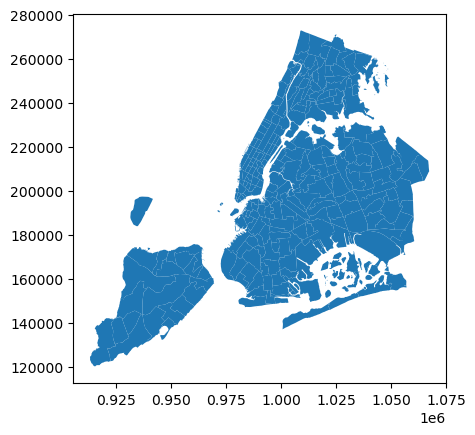

In [124]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [126]:
# Merge zones and trip records using locationID and PULocationID
merged_zone = df.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
print(merged_zone)



         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
1               1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
2               2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
3               2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
4               2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
...           ...                  ...                   ...              ...   
1391293         1  2023-09-30 23:00:09   2023-09-30 23:59:38              4.0   
1391294         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
1391295         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
1391296         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
1391297         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   

         trip_distance  Rat

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [128]:
# Group data by location and calculate the number of trips
trips_per_location = df.groupby("PULocationID")["PULocationID"].count().reset_index(name="total_trips")


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [130]:
# Merge trip counts back to the zones GeoDataFrame

trips_per_location = df.groupby("PULocationID")["PULocationID"].count().reset_index(name="total_trips")

trips_per_location = trips_per_location.sort_values(by="total_trips", ascending=False)
print(trips_per_location.head(10))


     PULocationID  total_trips
199           237        68714
134           161        66652
109           132        63064
198           236        62557
135           162        51886
115           138        51090
118           142        48079
155           186        47770
192           230        43760
143           170        42492


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

Trips Per Location:
   PULocationID  total_trips
0             1           35
1             2            2
2             4         1379
3             6            1
4             7          251


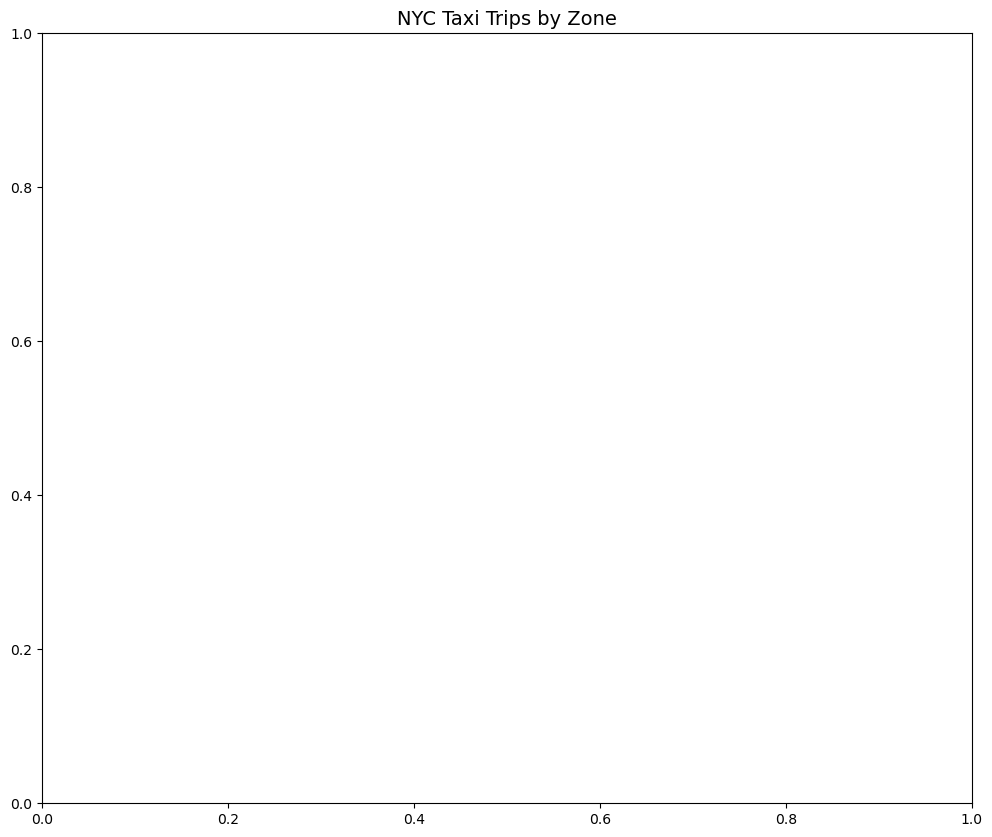

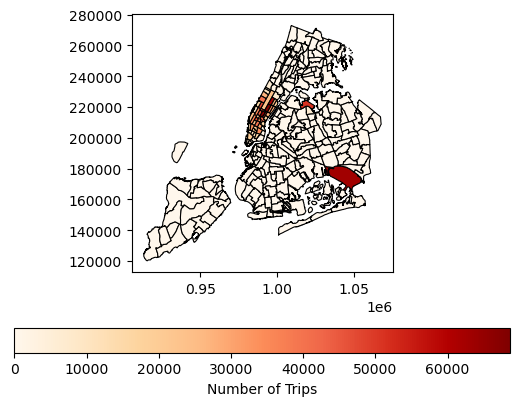

In [136]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Aggregate trip counts by pickup location
trips_per_location = df.groupby("PULocationID")["PULocationID"].count().reset_index(name="total_trips")

# Print for debugging
print("Trips Per Location:")
print(trips_per_location.head())

# Drop duplicate columns before merging
zones = zones.merge(trips_per_location[["PULocationID", "total_trips"]], 
                    left_on="LocationID", 
                    right_on="PULocationID", 
                    how="left")

# Drop the extra PULocationID column after merge
zones = zones.drop(columns=["PULocationID"])

# Fill NaN values (zones with no trips) with 0
zones["total_trips"] = zones["total_trips"].fillna(0)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map using 'total_trips' as the color column
zones.plot(
    column="total_trips",  # Column for color scale
    cmap="OrRd",  # Color scheme (Orange-Red)
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    legend_kwds={"label": "Number of Trips", "orientation": "horizontal"},
)
    

# Add title
ax.set_title("NYC Taxi Trips by Zone", fontsize=14)
# Show plot
plt.show()


In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

    hour  PULocationID  DOLocationID  speed_mph
0      0           234           125   0.294393
1      1           151            24   0.079240
2      2           170           125   0.131573
3      3           140           262   0.274120
4      4           162           162   0.064780
5      5           231            61   0.202373
6      6            70           138   0.085750
7      7            13           209   0.072703
8      8           232            68   0.207431
9      9           163           137   0.600590
10    10            45            45   0.059484
11    11           193           193   0.150000
12    12           113            66   0.144059
13    13           209           232   0.231789
14    14            71            71   0.290323
15    15            22            22   0.309047
16    16           144           217   0.274803
17    17           243           264   0.007772
18    18           211            52   0.132920
19    19           158           217   0

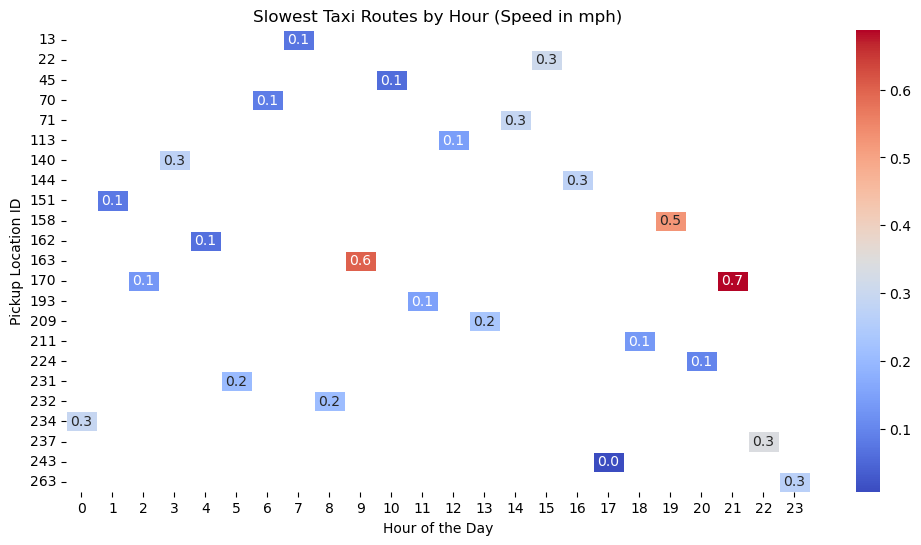

In [140]:
# Find routes which have the slowest speeds at different times of the day

import pandas as pd

# Convert to datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])


df["hour"] = df["tpep_pickup_datetime"].dt.hour # Extract hour 

# Calculate trip duration in hours
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 3600  # Convert seconds to hours
# Group by route and hour, then calculate average distance and duration
route_speed = df.groupby(["PULocationID", "DOLocationID", "hour"]).agg(
    avg_distance=("trip_distance", "mean"),
    avg_duration=("trip_duration", "mean")
).reset_index()

# Calculate speed (distance / duration)
route_speed["speed_mph"] = route_speed["avg_distance"] / route_speed["avg_duration"]

# Remove cases where duration is too small (avoiding division errors)
route_speed = route_speed[route_speed["avg_duration"] > 0]
slowest_routes_per_hour = route_speed.sort_values(by=["hour", "speed_mph"]).groupby("hour").first().reset_index()

print(slowest_routes_per_hour[["hour", "PULocationID", "DOLocationID", "speed_mph"]])

# Pivot table for heatmap
heatmap_data = slowest_routes_per_hour.pivot(index="PULocationID", columns="hour", values="speed_mph")

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)

# Customize
plt.xlabel("Hour of the Day")
plt.ylabel("Pickup Location ID")
plt.title("Slowest Taxi Routes by Hour (Speed in mph)")

# Show plot
plt.show()
 

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

The busiest hour is 18:00 with 101491 trips.


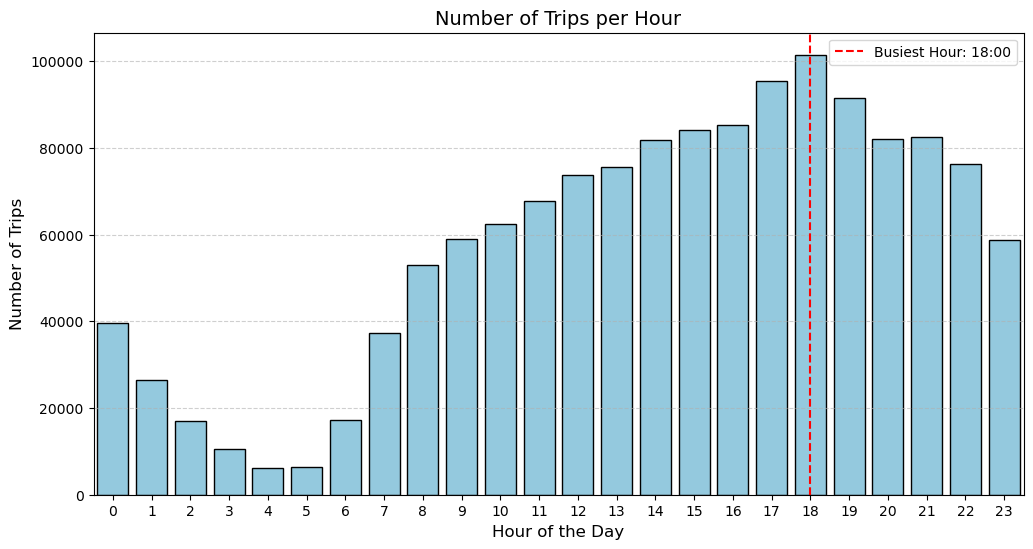

In [144]:
# Visualise the number of trips per hour and find the busiest hour
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract the hour from pickup time
df["hour"] = df["tpep_pickup_datetime"].dt.hour
# Count the number of trips per hour
hourly_trips = df["hour"].value_counts().sort_index()

# Find the busiest hour
busiest_hour = hourly_trips.idxmax()
busiest_hour_trips = hourly_trips.max()

print(f"The busiest hour is {busiest_hour}:00 with {busiest_hour_trips} trips.")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, color="skyblue", edgecolor="black")

plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.title("Number of Trips per Hour", fontsize=14)
plt.xticks(range(24))  # Ensure all 24 hours are displayed
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Highlight the busiest hour
plt.axvline(busiest_hour, color="red", linestyle="--", label=f"Busiest Hour: {busiest_hour}:00")
plt.legend()

plt.show()



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [146]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1
# Count the number of trips per hour
hourly_trips = df["hour"].value_counts().sort_values(ascending=False)

# Get the top 5 busiest hours
top_5_hours = hourly_trips.head(5)
# Scale up the trip counts

# Display the results
print("Top 5 Busiest Hours and Their Trip Counts:")

print(top_5_hours)



Top 5 Busiest Hours and Their Trip Counts:
hour
18    101491
17     95416
19     91460
16     85366
15     84125
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [150]:
# Compare traffic trends for the week days and weekends
df.head()
# Ensure the date column is in datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])  # Change column name if needed

# Extract the day of the week (0=Monday, 6=Sunday)
df["DayOfWeek"] = df["tpep_pickup_datetime"].dt.dayofweek

# Create a new column: 'Weekday' or 'Weekend'
df["DayType"] = df["DayOfWeek"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

# Group by DayType and analyze trip count & revenue
traffic_comparison = df.groupby("DayType").agg(
    Trip_Count=("tpep_pickup_datetime", "count"),
    Total_Revenue=("fare_amount", "sum")
).reset_index()

# Display the result
print(traffic_comparison)
df.head()


   DayType  Trip_Count  Total_Revenue
0  Weekday     1019187    19761597.55
1  Weekend      372081     7218046.61


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
5         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
6         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
8         2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1           1.24         1.0                  N           161           237   
5           7.10         1.0                  N           246            37   
6           1.59         1.0                  N            79           164   
7           3.16         1.0                  N            79           256   
8           7.64         1.0                  N           132            95   

   payment_type  ...  congestion_surcharge  airport_fee        date  hour  \
1             1  ...                   2.5          NaN  2023-01-01     0   
5             1  ...                   2.5          NaN  2023-01-01     0   
6             1  ...                   2.5          NaN  2023-01-01     0   
7             1  ...                   2.5          NaN  2023-01-01     0   
8             1  ...                   0.0          NaN  2023-01-01     0   

   day_of_week  month  quarter  trip_duration  DayOfWeek  DayType  
1       Sunday      1   2023Q1       0.084722          6  Weekend  
5       Sunday      1   2023Q1       0.560278          6  Weekend  
6       Sunday      1   2023Q1       0.175278          6  Weekend  
7       Sunday      1   2023Q1       0.264722          6  Weekend  
8       Sunday      1   2023Q1       0.285556          6  Weekend  

[5 rows x 27 columns]

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [152]:
# Find top 10 pickup and dropoff zones
import pandas as pd


# Ensure datetime format for pickup and dropoff times anf hour
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])  # Change column name if needed
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])  # Change column name if needed

df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df["dropoff_hour"] = df["tpep_dropoff_datetime"].dt.hour

# Group by pickup zone and hour, then count trips
pickup_counts = df.groupby(["PULocationID", "pickup_hour"]).size().reset_index(name="pickup_count")

# Group by dropoff zone and hour, then count trips
dropoff_counts = df.groupby(["DOLocationID", "dropoff_hour"]).size().reset_index(name="dropoff_count")

# Identify top 10 zones with the most pickups
top_10_pickup_zones = pickup_counts.groupby("PULocationID")["pickup_count"].sum().nlargest(10).index

# Identify top 10 zones with the most drop-offs
top_10_dropoff_zones = dropoff_counts.groupby("DOLocationID")["dropoff_count"].sum().nlargest(10).index

# Filter data for these top zones
top_pickup_trends = pickup_counts[pickup_counts["PULocationID"].isin(top_10_pickup_zones)]
top_dropoff_trends = dropoff_counts[dropoff_counts["DOLocationID"].isin(top_10_dropoff_zones)]

# Display results
print("Top 10 Pickup Zones - Hourly Trends:")
print(top_pickup_trends.head())

print("\nTop 10 Dropoff Zones - Hourly Trends:")
print(top_dropoff_trends.head())



Top 10 Pickup Zones - Hourly Trends:
      PULocationID  pickup_hour  pickup_count
1292           132            0          2654
1293           132            1          1142
1294           132            2           365
1295           132            3           211
1296           132            4           169

Top 10 Dropoff Zones - Hourly Trends:
      DOLocationID  dropoff_hour  dropoff_count
1334            68             0           1154
1335            68             1            789
1336            68             2            527
1337            68             3            343
1338            68             4            183


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [158]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
import pandas as pd

# Count pickups per zone (PULocationID)
pickup_counts = df["PULocationID"].value_counts().rename("pickup_count")

# Count drop-offs per zone (DOLocationID)
dropoff_counts = df["DOLocationID"].value_counts().rename("dropoff_count")

# Merge the two counts into one DataFrame
zone_ratios = pd.DataFrame({"pickup_count": pickup_counts, "dropoff_count": dropoff_counts}).fillna(0)

# Calculate the pickup/dropoff ratio (avoid division by zero)
zone_ratios["pickup_drop_ratio"] = zone_ratios["pickup_count"] / zone_ratios["dropoff_count"].replace(0, 1)
# Top 10 highest pickup/dropoff ratios
highest_ratios = zone_ratios.sort_values(by="pickup_drop_ratio", ascending=False).head(10)

# Top 10 lowest pickup/dropoff ratios
lowest_ratios = zone_ratios.sort_values(by="pickup_drop_ratio", ascending=True).head(10)

# Display results
print("Top 10 Highest Pickup/Dropoff Ratios:")
print(highest_ratios)

print("Top 10 Lowest Pickup/Dropoff Ratios:")
print(lowest_ratios)



Top 10 Highest Pickup/Dropoff Ratios:
     pickup_count  dropoff_count  pickup_drop_ratio
70         6340.0          457.0          13.873085
132       63064.0        13288.0           4.745936
138       51090.0        17718.0           2.883508
207          12.0            6.0           2.000000
2             2.0            0.0           2.000000
199           2.0            0.0           2.000000
186       47770.0        29005.0           1.646957
114       19533.0        14096.0           1.385712
43        23422.0        16933.0           1.383216
249       33383.0        25078.0           1.331167
Top 10 Lowest Pickup/Dropoff Ratios:
     pickup_count  dropoff_count  pickup_drop_ratio
27            0.0           21.0                0.0
176           0.0            8.0                0.0
30            0.0            7.0                0.0
174           0.0           64.0                0.0
32            0.0           34.0                0.0
172           0.0            9.0         

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [160]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
import pandas as pd


df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

df["hour"] = df["tpep_pickup_datetime"].dt.hour

# Filter trips that occurred between 11 PM and 5 AM
night_df = df[(df["hour"] >= 23) | (df["hour"] <= 5)]
night_pickups = night_df["PULocationID"].value_counts().rename("night_pickup_count") # Count pickups per zone (PULocationID)
night_dropoffs = night_df["DOLocationID"].value_counts().rename("night_dropoff_count") # Count drop-offs per zone (DOLocationID)

# Merge the two counts into one DataFrame
night_traffic = pd.DataFrame({"night_pickup_count": night_pickups, "night_dropoff_count": night_dropoffs}).fillna(0)

# Sort zones by highest pickup and drop-off counts
top_night_pickups = night_traffic.sort_values(by="night_pickup_count", ascending=False).head(10)
top_night_dropoffs = night_traffic.sort_values(by="night_dropoff_count", ascending=False).head(10)

# Display results
print("Top 10 Zones with Highest Night Pickups:")
print(top_night_pickups)

print("Top 10 Zones with Highest Night Drop-offs:")
print(top_night_dropoffs)


Top 10 Zones with Highest Night Pickups:
     night_pickup_count  night_dropoff_count
79              12654.0                 6667
249             10347.0                 4073
132              9421.0                 1016
48               7998.0                 5056
148              7908.0                 3438
114              7199.0                 2047
230              5826.0                 3021
186              5291.0                 2577
164              4730.0                 3050
138              4643.0                 1396
Top 10 Zones with Highest Night Drop-offs:
     night_pickup_count  night_dropoff_count
79              12654.0                 6667
48               7998.0                 5056
170              3226.0                 4983
107              4503.0                 4799
68               4622.0                 4448
141              2552.0                 4438
263              2703.0                 4192
249             10347.0                 4073
239             

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [162]:
# Filter for night hours (11 PM to 5 AM)
night_df = df[(df["hour"] >= 23) | (df["hour"] <= 5)]
day_df = df[(df["hour"] >= 6) & (df["hour"] <= 22)]
# Sum total fare amount for nighttime and daytime
night_revenue = night_df["fare_amount"].sum()
day_revenue = day_df["fare_amount"].sum()

# Calculate total revenue
total_revenue = night_revenue + day_revenue

# Compute revenue share percentages
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# Display results
print(f"Nighttime Revenue Share (11 PM - 5 AM): {night_share:.2f}%")
print(f"Daytime Revenue Share (6 AM - 10 PM): {day_share:.2f}%")



Nighttime Revenue Share (11 PM - 5 AM): 12.05%
Daytime Revenue Share (6 AM - 10 PM): 87.95%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [164]:
# Analyse the fare per mile per passenger for different passenger counts
df = df[(df["trip_distance"] > 0) & (df["passenger_count"] > 0)]
df["fare_per_mile_per_passenger"] = df["fare_amount"] / (df["trip_distance"] * df["passenger_count"])

fare_per_mile_stats = df.groupby("passenger_count")["fare_per_mile_per_passenger"].mean().reset_index()

# Display results
print(fare_per_mile_stats)

   passenger_count  fare_per_mile_per_passenger
0              1.0                     9.281017
1              2.0                     4.998136
2              3.0                     3.328625
3              4.0                     3.932980
4              5.0                     1.589161
5              6.0                     1.284684


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

Average Fare per Mile by Hour of the Day
    hour  fare_per_mile
0      0       7.672424
1      1       8.736084
2      2       8.010001
3      3       7.423142
4      4      11.358534
5      5      11.895619
6      6       9.996013
7      7       9.129399
8      8       9.042463
9      9       9.108804
10    10       9.289258
11    11       9.759957
12    12       9.987210
13    13      10.152552
14    14      10.211933
15    15      10.275973
16    16      12.323907
17    17      10.476752
18    18       9.716265
19    19       9.348290
20    20       8.010545
21    21       7.998292
22    22       8.314614
23    23       8.595171
Average Fare per Mile by Day of the Week
  day_of_week  fare_per_mile
1      Monday       9.174991
5     Tuesday       9.476830
6   Wednesday       9.337837
4    Thursday       9.696461
0      Friday       9.315353
2    Saturday       9.202231
3      Sunday      10.370137


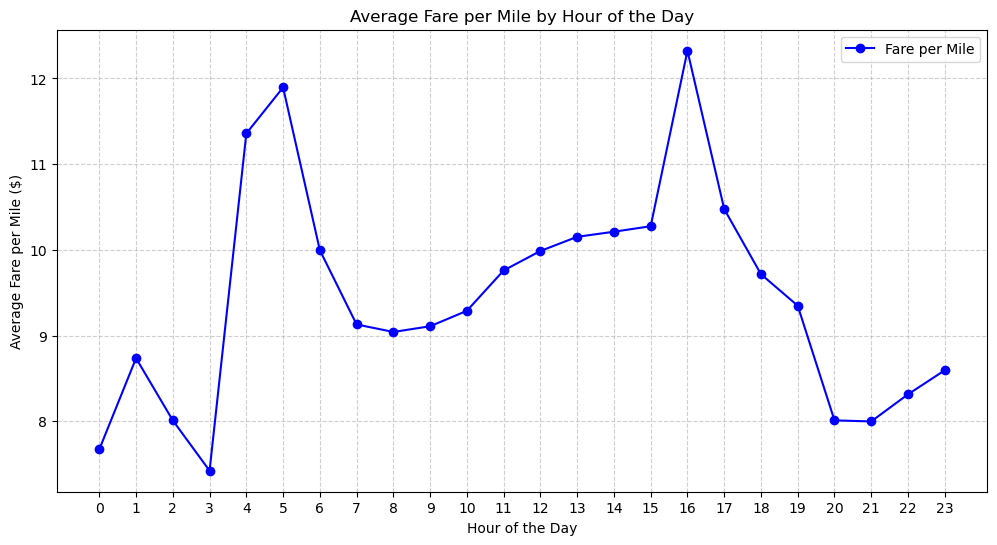

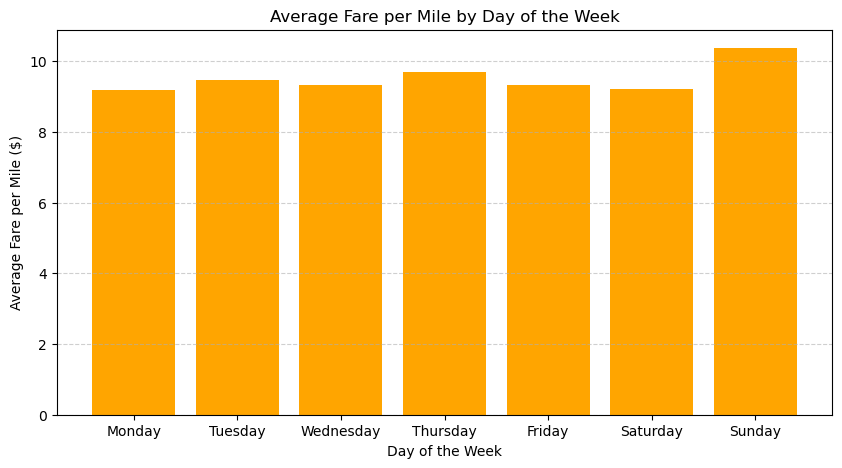

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

df = df[df["trip_distance"] > 0]
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"] # Compute fare per mile

# Convert pickup datetime to proper format and extract hour/day of the week
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["hour"] = df["tpep_pickup_datetime"].dt.hour
df["day_of_week"] = df["tpep_pickup_datetime"].dt.day_name()

# Group by hour
fare_per_mile_hour = df.groupby("hour")["fare_per_mile"].mean().reset_index()

# Group by day 
fare_per_mile_day = df.groupby("day_of_week")["fare_per_mile"].mean().reset_index()

# Sort days to start from Monday
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fare_per_mile_day["day_of_week"] = pd.Categorical(fare_per_mile_day["day_of_week"], categories=days_order, ordered=True)
fare_per_mile_day = fare_per_mile_day.sort_values("day_of_week")

# Display results
print("Average Fare per Mile by Hour of the Day")
print(fare_per_mile_hour)

print("Average Fare per Mile by Day of the Week")
print(fare_per_mile_day)

# Plot average fare per mile by hour
plt.figure(figsize=(12, 6))
plt.plot(fare_per_mile_hour["hour"], fare_per_mile_hour["fare_per_mile"], marker='o', linestyle='-', color='b', label="Fare per Mile")

# Customize the plot
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(24))
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

# Show the plot
plt.show()

# Plot average fare per mile by day of the week
plt.figure(figsize=(10, 5))
plt.bar(fare_per_mile_day["day_of_week"], fare_per_mile_day["fare_per_mile"], color="orange")

# Customize the plot
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Day of the Week")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

    VendorID  hour  fare_per_mile
0          1     0       6.680033
1          1     1       6.761314
2          1     2       6.859530
3          1     3       6.350188
4          1     4       7.047668
5          1     5       7.191032
6          1     6       6.373329
7          1     7       6.995602
8          1     8       7.917343
9          1     9       8.251627
10         1    10       8.206814
11         1    11       8.525003
12         1    12       8.609346
13         1    13       8.517659
14         1    14       8.523905
15         1    15       8.542131
16         1    16       8.679222
17         1    17       8.481920
18         1    18       8.252921
19         1    19       7.715780
20         1    20       7.239487
21         1    21       7.050710
22         1    22       6.792311
23         1    23       6.693212
24         2     0       7.945001
25         2     1       9.282134
26         2     2       8.337885
27         2     3       7.716387
28         2  

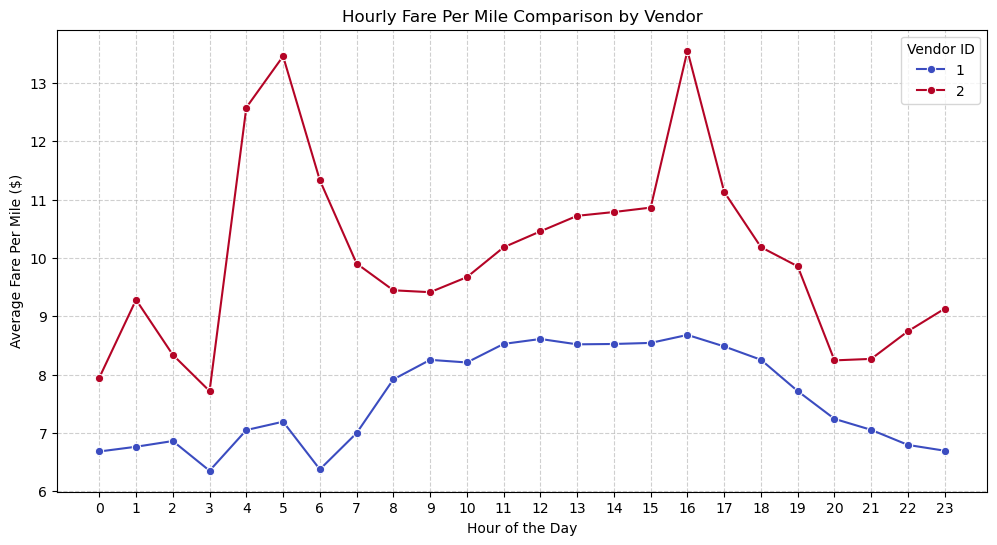

In [168]:
# Compare fare per mile for different vendors
#Checking if any rows with distance zero
df.head()
df = df[(df["trip_distance"] > 0) & (df["fare_amount"] > 0)]
df["fare_per_mile"] = df["fare_amount"] / df["trip_distance"]
df["hour"] = df["tpep_pickup_datetime"].dt.hour
fare_per_mile_by_vendor_hour = df.groupby(["VendorID", "hour"])["fare_per_mile"].mean().reset_index()

# Display results
print(fare_per_mile_by_vendor_hour)

plt.figure(figsize=(12, 6))
sns.lineplot(data=fare_per_mile_by_vendor_hour, x="hour", y="fare_per_mile", hue="VendorID", marker="o", palette="coolwarm")

# Customize plot
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare Per Mile ($)")
plt.title("Hourly Fare Per Mile Comparison by Vendor")
plt.xticks(range(24))
plt.legend(title="Vendor ID")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


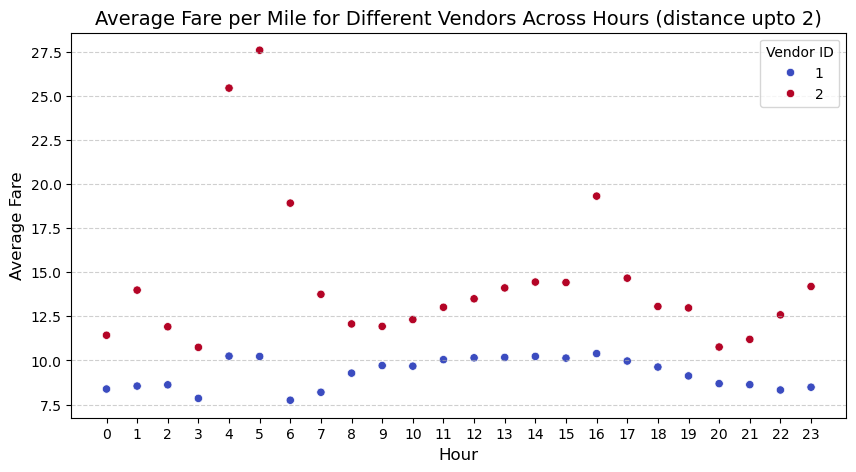

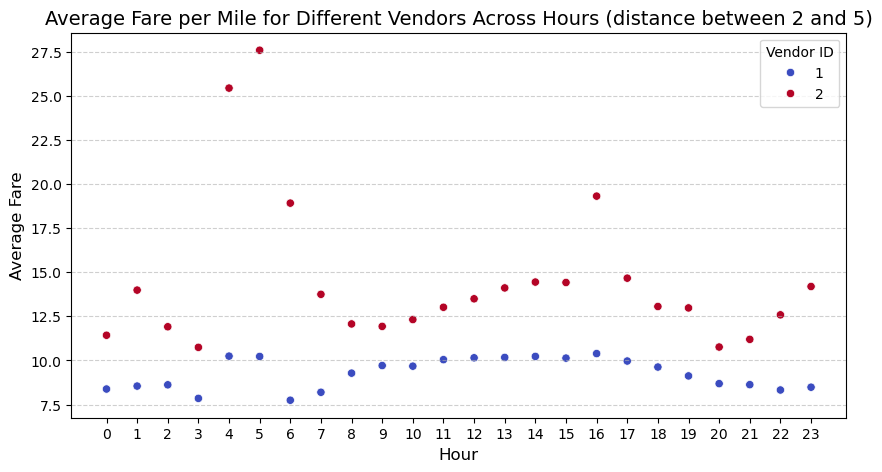

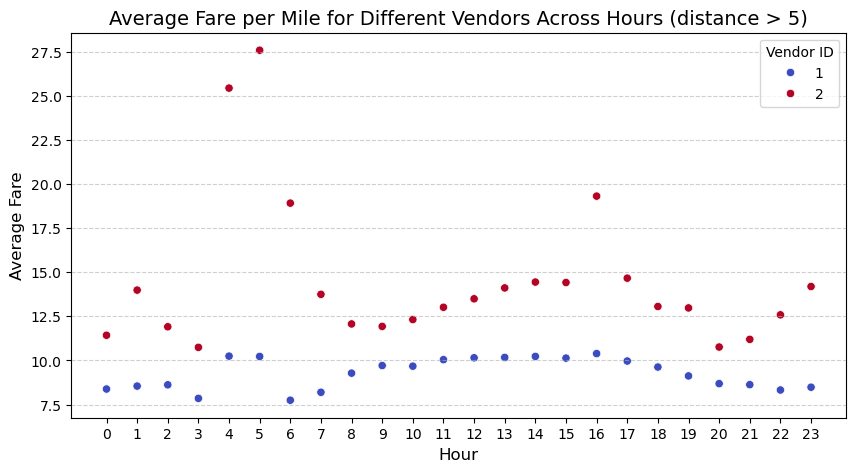

In [170]:
# Defining distance tiers
#checkning if any rows with distance 0
df = df[(df["trip_distance"] > 0) & (df["trip_distance"] <= 2)]  # Remove distance upto 2
df["fare_mile"] = df["fare_amount"] / df["trip_distance"]  #  fare per mile
#df["VendorID"] = df["VendorID"].astype(str)
# Convert pickup datetime to datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Hour
df["hour"] = df["tpep_pickup_datetime"].dt.hour

# Group by Vendor and Hour, then calculate average fare per mile
vendor_fare_mile = df.groupby(["VendorID", "hour"])["fare_mile"].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 5))
sns.scatterplot(data=vendor_fare_mile, x="hour", y="fare_mile",hue="VendorID" , marker="o", palette="coolwarm")
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Average Fare", fontsize=12)
plt.title("Average Fare per Mile for Different Vendors Across Hours (distance upto 2)", fontsize=14)
plt.xticks(range(0, 24))  # Show all hours from 0 to 23
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Vendor ID")
plt.show()

df = df[(df["trip_distance"] > 2) & (df["trip_distance"] <= 5)]  # Remove distance between 2 and 5
# Plot the data
plt.figure(figsize=(10, 5))
sns.scatterplot(data=vendor_fare_mile, x="hour", y="fare_mile",hue="VendorID" , marker="o", palette="coolwarm")
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Average Fare", fontsize=12)
plt.title("Average Fare per Mile for Different Vendors Across Hours (distance between 2 and 5)", fontsize=14)
plt.xticks(range(0, 24))  # Show all hours from 0 to 23
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Vendor ID")
plt.show()

df = df[(df["trip_distance"] > 5)]  # Remove distance greater than 5
# Plot the data
plt.figure(figsize=(10, 5))
sns.scatterplot(data=vendor_fare_mile, x="hour", y="fare_mile",hue="VendorID" , marker="o", palette="coolwarm")
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Average Fare", fontsize=12)
plt.title("Average Fare per Mile for Different Vendors Across Hours (distance > 5)", fontsize=14)
plt.xticks(range(0, 24))  # Show all hours from 0 to 23
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Vendor ID")
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

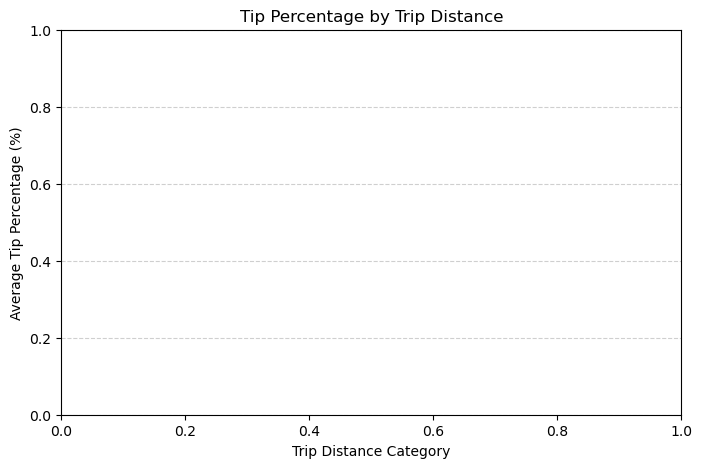

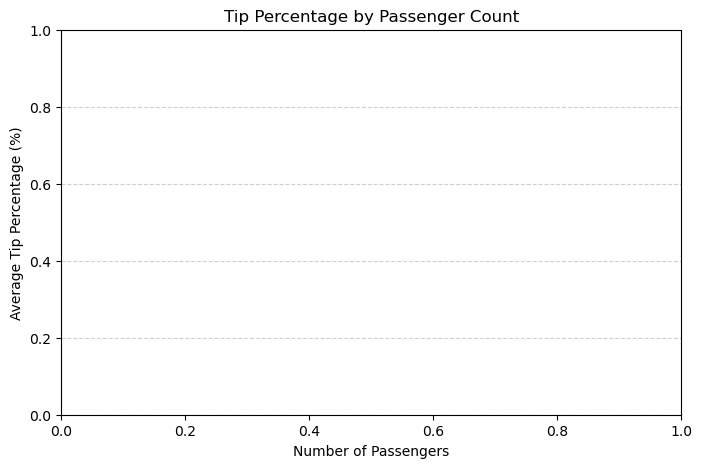

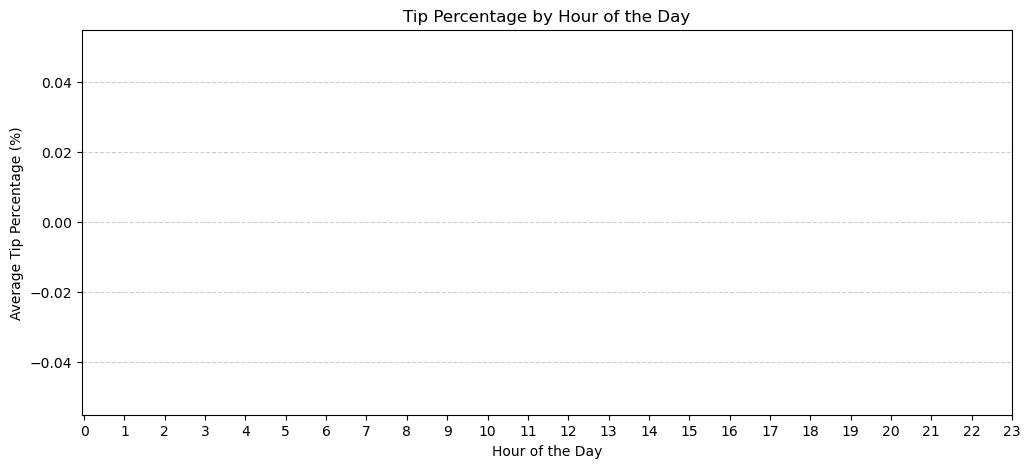

In [172]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Ensure valid fare amounts and non-zero values
df = df[(df["fare_amount"] > 0) & (df["tip_amount"] >= 0)]

# Compute tip percentage
df["tip_percentage"] = (df["tip_amount"] / df["fare_amount"]) * 100

# Convert pickup datetime to datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

# Extract relevant time features
df["hour"] = df["tpep_pickup_datetime"].dt.hour
df["day_of_week"] = df["tpep_pickup_datetime"].dt.day_name()

# Define trip distance categories
df["distance_category"] = pd.cut(
    df["trip_distance"], bins=[0, 2, 5, float("inf")], labels=["0-2 miles", "2-5 miles", ">5 miles"]
)

# Compute average tip percentage for different categories
tip_by_distance = df.groupby("distance_category",observed=True)["tip_percentage"].mean().reset_index()
tip_by_passenger = df.groupby("passenger_count",observed=True)["tip_percentage"].mean().reset_index()
tip_by_hour = df.groupby("hour",observed=True)["tip_percentage"].mean().reset_index()

# Plotting tip percentage by distance
plt.figure(figsize=(8, 5))
sns.barplot(data=tip_by_distance, x="distance_category", y="tip_percentage")
plt.xlabel("Trip Distance Category")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Tip Percentage by Trip Distance")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Plotting tip percentage by passenger count
plt.figure(figsize=(8, 5))
sns.barplot(data=tip_by_passenger, x="passenger_count", y="tip_percentage")
plt.xlabel("Number of Passengers")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Tip Percentage by Passenger Count")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# lotting tip percentage by hour
plt.figure(figsize=(12, 5))
sns.lineplot(data=tip_by_hour, x="hour", y="tip_percentage", marker="o", color="red")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Tip Percentage (%)")
plt.title("Tip Percentage by Hour of the Day")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(range(24))
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [178]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

import pandas as pd

df = df[df["fare_amount"] > 0]
df["tip_percentage"] = (df["tip_amount"] / df["fare_amount"]) * 100 # Calculate tip percentage
low_tip = df[df["tip_percentage"] < 10]
high_tip = df[df["tip_percentage"] > 25]

# Display summary
print(f"Low Tip Trips (<10%): {len(low_tip)}")
print(f"High Tip Trips (>25%): {len(high_tip)}")

Series([], Name: tip_percentage, dtype: bool)
Low Tip Trips (<10%): 0
High Tip Trips (>25%): 0


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

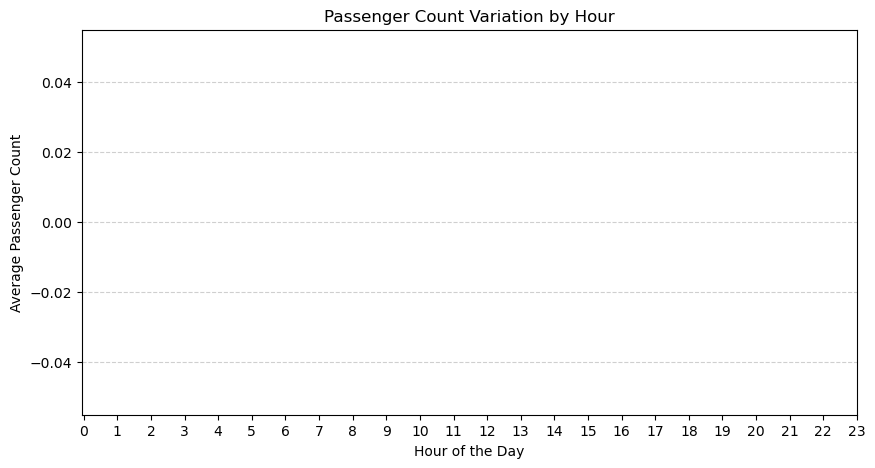

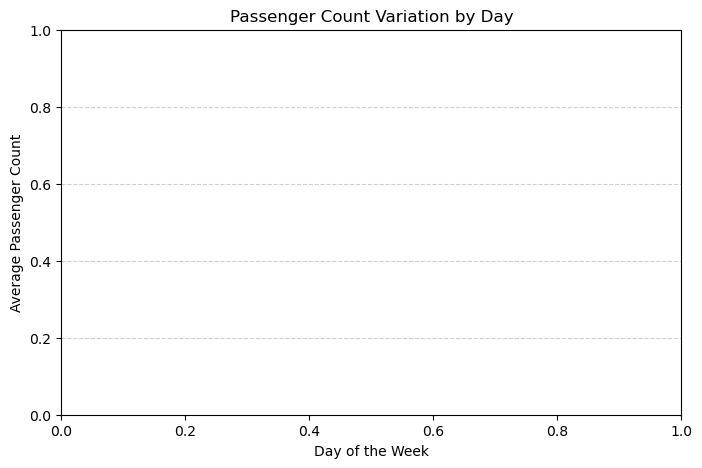

In [182]:
# See how passenger count varies across hours and days

passenger_by_hour = df.groupby("hour")["passenger_count"].mean().reset_index()
passenger_by_day = df.groupby("day_of_week")["passenger_count"].mean().reset_index()
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
passenger_by_day["day_of_week"] = pd.Categorical(passenger_by_day["day_of_week"], categories=days_order, ordered=True)
passenger_by_day = passenger_by_day.sort_values("day_of_week")
plt.figure(figsize=(10, 5))
sns.lineplot(data=passenger_by_hour, x="hour", y="passenger_count", marker="o", color="royalblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.title("Passenger Count Variation by Hour")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=passenger_by_day, x="day_of_week", y="passenger_count", palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.title("Passenger Count Variation by Day")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones
# Summary statistics for passenger counts
passenger_by_pickup_zone = df.groupby("PULocationID")["passenger_count"].sum().reset_index()
pickupstats = passenger_by_pickup_zone["total_passengers"].describe()
dropofstats = passenger_by_dropoff_zone["total_passengers"].describe()

print("Variatio of passennger for Pickup Zones:\n", pickupstats)
print("Variatio of passenngerfor Dropoff Zones:\n", dropofstats)


In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Aggregate total passengers and trips per zone
passenger_by_pickup_zone = df.groupby("PULocationID")["passenger_count"].sum().reset_index()
passenger_by_pickup_zone.rename(columns={"passenger_count": "total_passengers"}, inplace=True)

trips_per_location = df.groupby("PULocationID")["PULocationID"].count().reset_index(name="total_trips")

# Merge trip and passenger data
zones_with_trips = zones_df.merge(passenger_by_pickup_zone, left_on="LocationID", right_on="PULocationID", how="left")
zones_with_trips = zones_with_trips.merge(trips_per_location, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values (zones with no trips) with 0
zones_with_trips["total_passengers"] = zones_with_trips["total_passengers"].fillna(0)
zones_with_trips["total_trips"] = zones_with_trips["total_trips"].fillna(0)

# Compute average passengers per trip
zones_with_trips["average_passenger_count"] = zones_with_trips["total_passengers"] / zones_with_trips["total_trips"]
zones_with_trips["average_passenger_count"] = zones_with_trips["average_passenger_count"].fillna(0)

# Display results
print(zones_with_trips[["zone", "total_trips", "total_passengers", "average_passenger_count"]])

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?

Depending on the dataset, surcharge-related columns may include:

extra (extra charges like night surcharge)

mta_tax (Metropolitan Transportation Authority tax)

congestion_surcharge (for high-traffic areas)

airport_fee (for trips involving airports)

             df.columns  # Inspect available surcharge columns


             surcharge_counts = {
    "extra": (df["extra"] > 0).sum(),
    "mta_tax": (df["mta_tax"] > 0).sum(),
    "congestion_surcharge": (df["congestion_surcharge"] > 0).sum(),
    "airport_fee": (df["airport_fee"] > 0).sum()
}

                             import pandas as pd
surcharge_df = pd.DataFrame(list(surcharge_counts.items()), columns=["Surcharge Type", "Count"])

                             import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=surcharge_df, x="Surcharge Type", y="Count", palette="coolwarm")
plt.xlabel("Surcharge Type")
plt.ylabel("Number of Trips Applied")
plt.title("Frequency of Surcharge Application")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Observation 1 - Peak demand occurs between 3 PM - 7 PM and late-night (11 PM - 2 AM on weekends).
Strategy - Increase taxi allocation in high-demand zones during rush hours.

Observation 2: Revenue share for nighttime is 12.66%, while daytime accounts for 87.34% 
Strategy Offer flat-rate or shared ride discount during night time will help increase revenue

Observation 3:  High drop-off zones don’t always have enough pickups.
Strategy -Encourage taxis to stay longer in high-drop-off areas for return trips. 
Reduce empty return trips & improve ride efficiency.

Observation4: Certain routes consistently have low speeds 
Strategy -Route Cabs to different route to avoid traffic by checking real traffic data. 


Observation5: Fare drop when passenger count is 5
Strategy -Above data suggest potential pricing inefficiencies,optimize price strategies to remove discrepancies


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
Weekend Adjustments: Demand is lower during weekends, but late-night hours pickups are higher so allocate Cabs as per the demand in the high pickup zones.

Monthly Adjustments: 
March, May, and October see the highest pickups.
July, August, and September have lower demand.
During high-demand months: Increase cabs in tourist-heavy zones 
During low-demand months: Offer seasonal discounts or encourage group bookings.

Traffic congestion slows trips in some areas, affecting efficiency - recommend nearby alternative pickup points to passengers.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:

Increase fares during peak hours (3 PM - 7 PM & 11 PM - 3 AM) to capture high demand and maximize revenue

Lower base fares for short trips (<1 mile) to increase frequency of short trips 

Fare increases with distance - give discounts for miles > 40 will help get more business

Driver Incentives: Offer higher pay rates for drivers operating in low-demand hours to improve fleet availability.

Payment Type: Majority of transactions are cashless, indicating a strong preference for credit/debit cards. Offer discounts for card & app-based payments Also consider promotions for alternative payment methods distribute revenue sources more evenly.

Optimize pricing strategy: Adjust fares for long-distance trips to ensure profitability.
